In [1]:
#libs for data manipulation
import os
import pandas as pd
import numpy as np

#libs for data visulization & analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#machine learning methods
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/NSE 2018 data.csv')

In [0]:
IOB = df[df.SYMBOL.isin(['IOB'])]

In [4]:
print(IOB.head())
print(IOB.shape)
print(IOB.info())

       SYMBOL       sector   OPEN  ...     TOTTRDVAL      TIMESTAMP  TOTALTRADES
134744    IOB  Banks - PSU  22.20  ...  2.178484e+07  1/1/2018 0:00         2046
134745    IOB  Banks - PSU  22.35  ...  1.608124e+07  1/2/2018 0:00         1954
134746    IOB  Banks - PSU  22.40  ...  2.253496e+07  1/3/2018 0:00         1322
134747    IOB  Banks - PSU  22.70  ...  6.572533e+07  1/4/2018 0:00         4526
134748    IOB  Banks - PSU  24.50  ...  1.436609e+08  1/5/2018 0:00         9965

[5 rows x 10 columns]
(215, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 134744 to 134958
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SYMBOL       215 non-null    object 
 1   sector       215 non-null    object 
 2   OPEN         215 non-null    float64
 3   HIGH         215 non-null    float64
 4   LOW          215 non-null    float64
 5   CLOSE        215 non-null    float64
 6   TOTTRDQTY    215 non-null  

Multiple Linear Regression using statsmodels

In [0]:
x = IOB[['OPEN','HIGH','LOW','TOTTRDQTY','TOTTRDVAL','TOTALTRADES']]
y = IOB['CLOSE'].values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(172, 6)
(43, 6)
(172,)
(43,)


In [0]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [8]:
lin_model = sm.OLS(Y_train, X_train)
result = lin_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9945.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          2.45e-208
Time:                        10:45:03   Log-Likelihood:                 80.501
No. Observations:                 172   AIC:                            -147.0
Df Residuals:                     165   BIC:                            -125.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0126      0.099     -0.128      0.898      -0.207       0.182
OPEN           -0.1218      0.054     -2.268      0.025      -0.228      -0.016
HIGH            0.5655      0.060      9.493      0.000       0.448       0.683
LOW             0.5575      0.050     11.144      0.000       0.459       0.656
TOTTRDQTY    8.159e-08   7.63e-08      1.069      0.287   -6.91e-08    2.32e-07
TOTTRDVAL     -4.6e-09   3.54e-09     -1.301      0.195   -1.16e-08    2.38e-09
TOTALTRADES -4.365e-05    2.3e-05     -1.897      0.060   -8.91e-05    1.79e-06
==============================================================================
Omnibus:                       21.662   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.303
Skew:                           0.188   Prob(JB):                     1.22e-21
Kurtosis:                       6.646   Cond. No.                     1.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
x1 = IOB[['OPEN','HIGH','LOW','TOTTRDVAL']]

In [0]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1,y, test_size = 0.2, random_state=5)
X_train1 = sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1)

In [11]:
lin_model1 = sm.OLS(Y_train1, X_train1)
result = lin_model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.477e+04
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          9.86e-212
Time:                        10:45:03   Log-Likelihood:                 78.644
No. Observations:                 172   AIC:                            -147.3
Df Residuals:                     167   BIC:                            -131.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0197      0.080     -0.245      0.807      -0.178       0.139
OPEN          -0.1285      0.054     -2.386      0.018      -0.235      -0.022
HIGH           0.5503      0.059      9.354      0.000       0.434       0.666
LOW            0.5786      0.048     12.080      0.000       0.484       0.673
TOTTRDVAL   -3.74e-09   1.05e-09     -3.576      0.000   -5.81e-09   -1.68e-09
==============================================================================
Omnibus:                       24.215   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.752
Skew:                           0.286   Prob(JB):                     8.92e-25
Kurtosis:                       6.889   Cond. No.                     1.66e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
lin_model_2 = sm.OLS(Y_test1, X_test1)
result1 = lin_model_2.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2189.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           2.37e-44
Time:                        10:45:03   Log-Likelihood:                 6.8091
No. Observations:                  43   AIC:                            -3.618
Df Residuals:                      38   BIC:                             5.188
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5135      0.242     -2.124      0.040      -1.003      -0.024
OPEN           0.0682      0.155      0.441      0.662      -0.245       0.381
HIGH           0.6770      0.169      4.016      0.000       0.336       1.018
LOW            0.2815      0.066      4.275      0.000       0.148       0.415
TOTTRDVAL  -7.238e-09      4e-09     -1.809      0.078   -1.53e-08    8.64e-10
==============================================================================
Omnibus:                        5.432   Durbin-Watson:                   2.412
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.684
Skew:                           0.326   Prob(JB):                       0.0583
Kurtosis:                       4.657   Cond. No.                     1.50e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Prediction for train data 
predictions = result.predict(sm.add_constant(X_train1))
metrics.mean_squared_error(Y_train1,predictions)

0.023462622940561558

In [14]:
#Prediction for test data
predictions1 = result.predict(sm.add_constant(X_test1))
metrics.mean_squared_error(Y_test1,predictions1)

0.06949963433629386

In [15]:
r2_score(Y_test1, predictions1)

0.9929610889423238

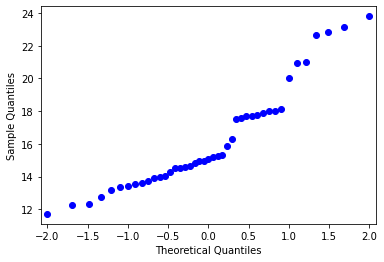

In [16]:
fig = sm.qqplot(predictions1)

plt.show()

Multiple Linear Regression using Scikit-Learn

In [17]:
IOB.head()

,SYMBOL,sector,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES
134744,IOB,Banks - PSU,22.20,22.60,22.15,22.45,970208,2.178484e+07,1/1/2018 0:00,2046
134745,IOB,Banks - PSU,22.35,22.60,22.30,22.35,717179,1.608124e+07,1/2/2018 0:00,1954
134746,IOB,Banks - PSU,22.40,22.65,22.25,22.50,1002936,2.253496e+07,1/3/2018 0:00,1322
134747,IOB,Banks - PSU,22.70,23.45,22.65,23.05,2846170,6.572533e+07,1/4/2018 0:00,4526
134748,IOB,Banks - PSU,24.50,25.40,23.90,24.15,5906944,1.436609e+08,1/5/2018 0:00,9965


In [18]:
df1 = IOB.drop(['SYMBOL', 'sector', 'TOTTRDQTY','TIMESTAMP','TOTALTRADES'], axis=1)
df1.head()

,OPEN,HIGH,LOW,CLOSE,TOTTRDVAL
134744,22.20,22.60,22.15,22.45,2.178484e+07
134745,22.35,22.60,22.30,22.35,1.608124e+07
134746,22.40,22.65,22.25,22.50,2.253496e+07
134747,22.70,23.45,22.65,23.05,6.572533e+07
134748,24.50,25.40,23.90,24.15,1.436609e+08


In [0]:
x = df1[['OPEN','HIGH','LOW','TOTTRDVAL']]
y = df1['CLOSE'].values

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

In [0]:
my_model = LinearRegression(normalize=True)

In [22]:
my_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
predictions = my_model.predict(X_test)

In [24]:
pd.DataFrame({'CLOSE': Y_test, 'predictions':predictions}).sample(10)

,CLOSE,predictions
33,14.55,14.605967
15,12.80,12.781788
5,14.15,13.952203
26,16.25,16.269866
40,14.75,14.812196
22,13.90,14.009953
8,23.95,23.815775
25,18.10,17.973611
21,14.50,14.519502
6,13.10,13.368806


plt.figure(figsize=(10,8))
plt.title('Linear Model')
plt.plot(IOB['CLOSE'])
plt.plot(predictions[['predictions']])
plt.legend(['Orig', 'Pred'])
plt.show()

In [25]:
my_model.coef_

array([ 0.00000000e+00, -1.21800751e-01,  5.65505603e-01,  5.57482279e-01,
        8.15932763e-08, -4.59983136e-09, -4.36533298e-05])

In [26]:
my_model.intercept_

-0.012606380531792638

In [27]:
my_model.score(X_test, Y_test)

0.993274524811112

In [28]:
mean_absolute_error(Y_test, predictions)

0.13760653128340633

In [29]:
mean_squared_error(Y_test, predictions)

0.06640488316098167

In [30]:
r2_score(Y_test, predictions)

0.993274524811112

Decision Tree Regressor

In [31]:
IOB.head()

,SYMBOL,sector,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES
134744,IOB,Banks - PSU,22.20,22.60,22.15,22.45,970208,2.178484e+07,1/1/2018 0:00,2046
134745,IOB,Banks - PSU,22.35,22.60,22.30,22.35,717179,1.608124e+07,1/2/2018 0:00,1954
134746,IOB,Banks - PSU,22.40,22.65,22.25,22.50,1002936,2.253496e+07,1/3/2018 0:00,1322
134747,IOB,Banks - PSU,22.70,23.45,22.65,23.05,2846170,6.572533e+07,1/4/2018 0:00,4526
134748,IOB,Banks - PSU,24.50,25.40,23.90,24.15,5906944,1.436609e+08,1/5/2018 0:00,9965


In [0]:
x = IOB[['OPEN','HIGH','LOW','TOTTRDQTY','TOTALTRADES']]
y = IOB['CLOSE']

In [33]:
x.head()

,OPEN,HIGH,LOW,TOTTRDQTY,TOTALTRADES
134744,22.20,22.60,22.15,970208,2046
134745,22.35,22.60,22.30,717179,1954
134746,22.40,22.65,22.25,1002936,1322
134747,22.70,23.45,22.65,2846170,4526
134748,24.50,25.40,23.90,5906944,9965


In [34]:
y.head()

134744    22.45
134745    22.35
134746    22.50
134747    23.05
134748    24.15
Name: CLOSE, dtype: float64

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

In [0]:
Classifier = DecisionTreeRegressor()

In [37]:
Classifier.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
test = [[22.20,22.60,22.15,970208,2046]]

In [0]:
prediction = Classifier.predict(test)

In [40]:
prediction

array([22.45])

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = [{"max_depth":[2,3,4,None], "max_features":[1,2,3,4,None]}]

In [0]:
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123), param_grid=param_grid,cv=10)

In [44]:
gs.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=123,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4, None],
                          'max_features': [1, 2, 3, 4, None]}],
             pre_dispatch='2*n_jobs

In [45]:
gs.cv_results_['params']

[{'max_depth': 2, 'max_features': 1},
 {'max_depth': 2, 'max_features': 2},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 2, 'max_features': 4},
 {'max_depth': 2, 'max_features': None},
 {'max_depth': 3, 'max_features': 1},
 {'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': None},
 {'max_depth': 4, 'max_features': 1},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': None},
 {'max_depth': None, 'max_features': 1},
 {'max_depth': None, 'max_features': 2},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': None}]

In [46]:
gs.best_params_

{'max_depth': None, 'max_features': None}

In [47]:
gs.cv_results_['rank_test_score']

array([19, 14, 13, 15, 16, 18, 12, 10,  9, 11, 20,  8,  5,  6,  4, 17,  7,
        3,  2,  1], dtype=int32)

In [48]:
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [0]:
predictions = gs.predict(X_test)

In [50]:
predictions[:5]

array([22.65, 17.95, 15.  , 17.6 , 21.05])

In [51]:
Y_test[:5]

array([22.65, 17.8 , 14.95, 17.6 , 20.85])

In [52]:
mean_absolute_error(Y_test, predictions)

0.22093023255813973

In [53]:
r2_score(Y_test, predictions)

0.9859268145056378

In [0]:
tree1 = DecisionTreeRegressor(max_depth=2,max_features=2)

In [55]:
tree1.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
predictions2 = tree1.predict(X_test)

In [57]:
predictions2[:5]

array([23.09473684, 17.55      , 14.62168142, 17.55      , 21.06666667])

In [58]:
Y_test[:5]

array([22.65, 17.8 , 14.95, 17.6 , 20.85])

In [59]:
mean_absolute_error(Y_test, predictions2)

0.6636447828771349

In [60]:
r2_score(Y_test, predictions2)

0.9098578188918411

In [0]:
from sklearn.tree import export_graphviz

In [0]:
dot_data = export_graphviz(tree1, filled=True, feature_names=X_train.columns, out_file=None)

In [0]:
import graphviz

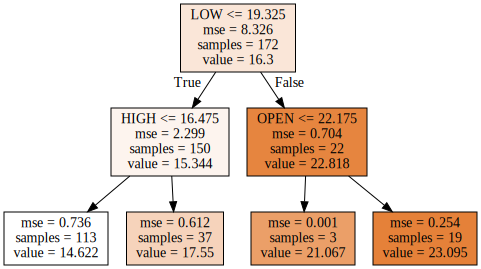

In [64]:
graphviz.Source(dot_data)

In [65]:
np.unique(predictions2)

array([14.62168142, 17.55      , 21.06666667, 23.09473684])

support vector regression

In [66]:
IOB.head()

,SYMBOL,sector,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES
134744,IOB,Banks - PSU,22.20,22.60,22.15,22.45,970208,2.178484e+07,1/1/2018 0:00,2046
134745,IOB,Banks - PSU,22.35,22.60,22.30,22.35,717179,1.608124e+07,1/2/2018 0:00,1954
134746,IOB,Banks - PSU,22.40,22.65,22.25,22.50,1002936,2.253496e+07,1/3/2018 0:00,1322
134747,IOB,Banks - PSU,22.70,23.45,22.65,23.05,2846170,6.572533e+07,1/4/2018 0:00,4526
134748,IOB,Banks - PSU,24.50,25.40,23.90,24.15,5906944,1.436609e+08,1/5/2018 0:00,9965


In [0]:
df2 = IOB.drop(['SYMBOL','sector','TIMESTAMP','OPEN','HIGH','LOW','TOTTRDQTY','TOTTRDVAL','TOTALTRADES'],1)

In [68]:
df2.head()

,CLOSE
134744,22.45
134745,22.35
134746,22.50
134747,23.05
134748,24.15


In [0]:
prediction_days = 30
df2['close Prediction'] = df2[['CLOSE']].shift(-prediction_days)

In [70]:
df2.head()

,CLOSE,close Prediction
134744,22.45,18.30
134745,22.35,18.25
134746,22.50,18.20
134747,23.05,18.15
134748,24.15,17.65


In [72]:
x = np.array(df2.drop(['close Prediction'],1))
x= x[:len(df2)-prediction_days]
print(x)

[[22.45]
 [22.35]
 [22.5 ]
 [23.05]
 [24.15]
 [23.95]
 [23.95]
 [23.55]
 [23.35]
 [23.5 ]
 [23.45]
 [22.95]
 [23.15]
 [23.1 ]
 [23.15]
 [23.  ]
 [23.2 ]
 [23.3 ]
 [23.3 ]
 [22.8 ]
 [22.65]
 [22.65]
 [22.25]
 [21.1 ]
 [21.05]
 [20.45]
 [20.85]
 [21.05]
 [20.9 ]
 [18.15]
 [18.3 ]
 [18.25]
 [18.2 ]
 [18.15]
 [17.65]
 [17.5 ]
 [17.95]
 [17.45]
 [17.5 ]
 [17.7 ]
 [17.6 ]
 [17.95]
 [17.95]
 [18.  ]
 [18.2 ]
 [17.95]
 [17.95]
 [18.1 ]
 [18.1 ]
 [18.1 ]
 [18.15]
 [18.1 ]
 [17.8 ]
 [17.6 ]
 [17.45]
 [17.8 ]
 [17.8 ]
 [18.3 ]
 [18.35]
 [18.15]
 [18.1 ]
 [18.05]
 [18.05]
 [17.85]
 [17.55]
 [16.85]
 [16.75]
 [16.6 ]
 [16.25]
 [16.  ]
 [16.  ]
 [15.85]
 [15.9 ]
 [15.8 ]
 [16.  ]
 [16.55]
 [16.65]
 [16.25]
 [16.2 ]
 [16.1 ]
 [15.55]
 [15.35]
 [15.65]
 [15.95]
 [16.25]
 [16.  ]
 [15.95]
 [15.75]
 [15.65]
 [15.15]
 [15.1 ]
 [15.1 ]
 [14.9 ]
 [14.8 ]
 [15.05]
 [14.85]
 [14.95]
 [14.2 ]
 [13.9 ]
 [14.05]
 [13.95]
 [13.95]
 [13.7 ]
 [14.  ]
 [13.95]
 [13.95]
 [13.85]
 [13.65]
 [13.2 ]
 [13.45]
 [13.9 ]
 

In [73]:
y = np.array(df2['close Prediction'])
y = y[:-prediction_days]
print(y)

[18.3  18.25 18.2  18.15 17.65 17.5  17.95 17.45 17.5  17.7  17.6  17.95
 17.95 18.   18.2  17.95 17.95 18.1  18.1  18.1  18.15 18.1  17.8  17.6
 17.45 17.8  17.8  18.3  18.35 18.15 18.1  18.05 18.05 17.85 17.55 16.85
 16.75 16.6  16.25 16.   16.   15.85 15.9  15.8  16.   16.55 16.65 16.25
 16.2  16.1  15.55 15.35 15.65 15.95 16.25 16.   15.95 15.75 15.65 15.15
 15.1  15.1  14.9  14.8  15.05 14.85 14.95 14.2  13.9  14.05 13.95 13.95
 13.7  14.   13.95 13.95 13.85 13.65 13.2  13.45 13.9  13.9  13.75 13.7
 13.8  13.95 14.5  14.95 14.9  15.05 14.85 15.   15.85 15.4  15.15 16.1
 15.9  15.7  15.6  15.3  15.35 15.5  15.4  15.25 14.9  14.95 14.9  14.9
 15.55 15.6  15.45 15.05 14.85 14.9  15.   14.85 14.55 14.3  14.65 14.6
 15.4  15.   14.15 13.65 13.6  13.95 13.85 13.1  13.3  13.75 13.45 12.45
 11.55 11.85 12.7  12.35 12.6  13.1  13.2  13.05 12.8  12.9  13.1  13.2
 13.05 13.95 14.35 14.85 15.   14.8  14.6  14.8  14.75 14.95 14.6  14.55
 14.6  14.85 15.   15.15 14.6  14.7  14.6  14.5  14.55 14

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [75]:
prediction_days_array = np.array(df2.drop(['close Prediction'],1))[-prediction_days:]
print(prediction_days_array)

[[14.55]
 [14.6 ]
 [14.85]
 [15.  ]
 [15.15]
 [14.6 ]
 [14.7 ]
 [14.6 ]
 [14.5 ]
 [14.55]
 [14.6 ]
 [14.45]
 [14.3 ]
 [14.4 ]
 [14.3 ]
 [14.3 ]
 [13.9 ]
 [14.15]
 [14.15]
 [14.1 ]
 [14.75]
 [14.7 ]
 [14.75]
 [14.8 ]
 [14.95]
 [15.  ]
 [14.75]
 [14.75]
 [14.8 ]
 [14.95]]


In [76]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [78]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.5306693658245315


In [79]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[17.79640458 15.11095778 17.90403653 14.86101606 15.12881633 14.53988487
 14.62906209 13.79163501 17.81434243 14.36159203 14.53988487 16.00472553
 14.41507114 15.2002578  17.07918831 14.52205187 14.7717873  15.30744149
 15.87950048 15.48613684 14.87886413 14.52205187 14.84316876 14.66473863
 16.8641516  16.09418997 15.21811997 17.6529138  15.96894392 14.27247708
 15.05738652 15.57551    15.14667561 15.98683442 15.96894392 14.89671296
 14.87886413]


In [80]:
print(y_test)
print()

[18.15 13.9  17.5  15.4  13.3  14.85 15.7  14.5  18.   15.6  15.5  15.1
 14.6  14.   18.3  15.6  15.   13.95 16.   14.2  15.85 15.05 14.95 14.85
 17.8  15.75 13.95 18.1  16.55 14.15 11.55 14.85 14.9  15.8  15.9  14.8
 13.2 ]



In [81]:
svm_prediction = svr_rbf.predict(prediction_days_array)
print(svm_prediction)

[14.75394388 14.7717873  14.86101606 14.91456256 14.96811591 14.7717873
 14.80747647 14.7717873  14.73610125 14.75394388 14.7717873  14.7182594
 14.66473863 14.70041835 14.66473863 14.66473863 14.52205187 14.61122503
 14.61122503 14.59338877 14.82532223 14.80747647 14.82532223 14.84316876
 14.89671296 14.91456256 14.82532223 14.82532223 14.84316876 14.89671296]


In [82]:
df2.head(prediction_days).head()

,CLOSE,close Prediction
134744,22.45,18.30
134745,22.35,18.25
134746,22.50,18.20
134747,23.05,18.15
134748,24.15,17.65
